<a href="https://colab.research.google.com/github/kimhg93/fintech-academy/blob/main/%ED%95%80%ED%85%8C%ED%81%AC%EA%B5%90%EC%95%88V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 데이터를 불러옵니다.

In [ ]:
import pandas as pd

housing = pd.read_csv('./sample_data/california_housing_train.csv')

#housing.head() # 첫 다섯 행 출력
#housing.info() # 전체 테이블 구조
housing.describe() # 요약 정보

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


2. 데이터를 대략적으로 읽어봅니다.

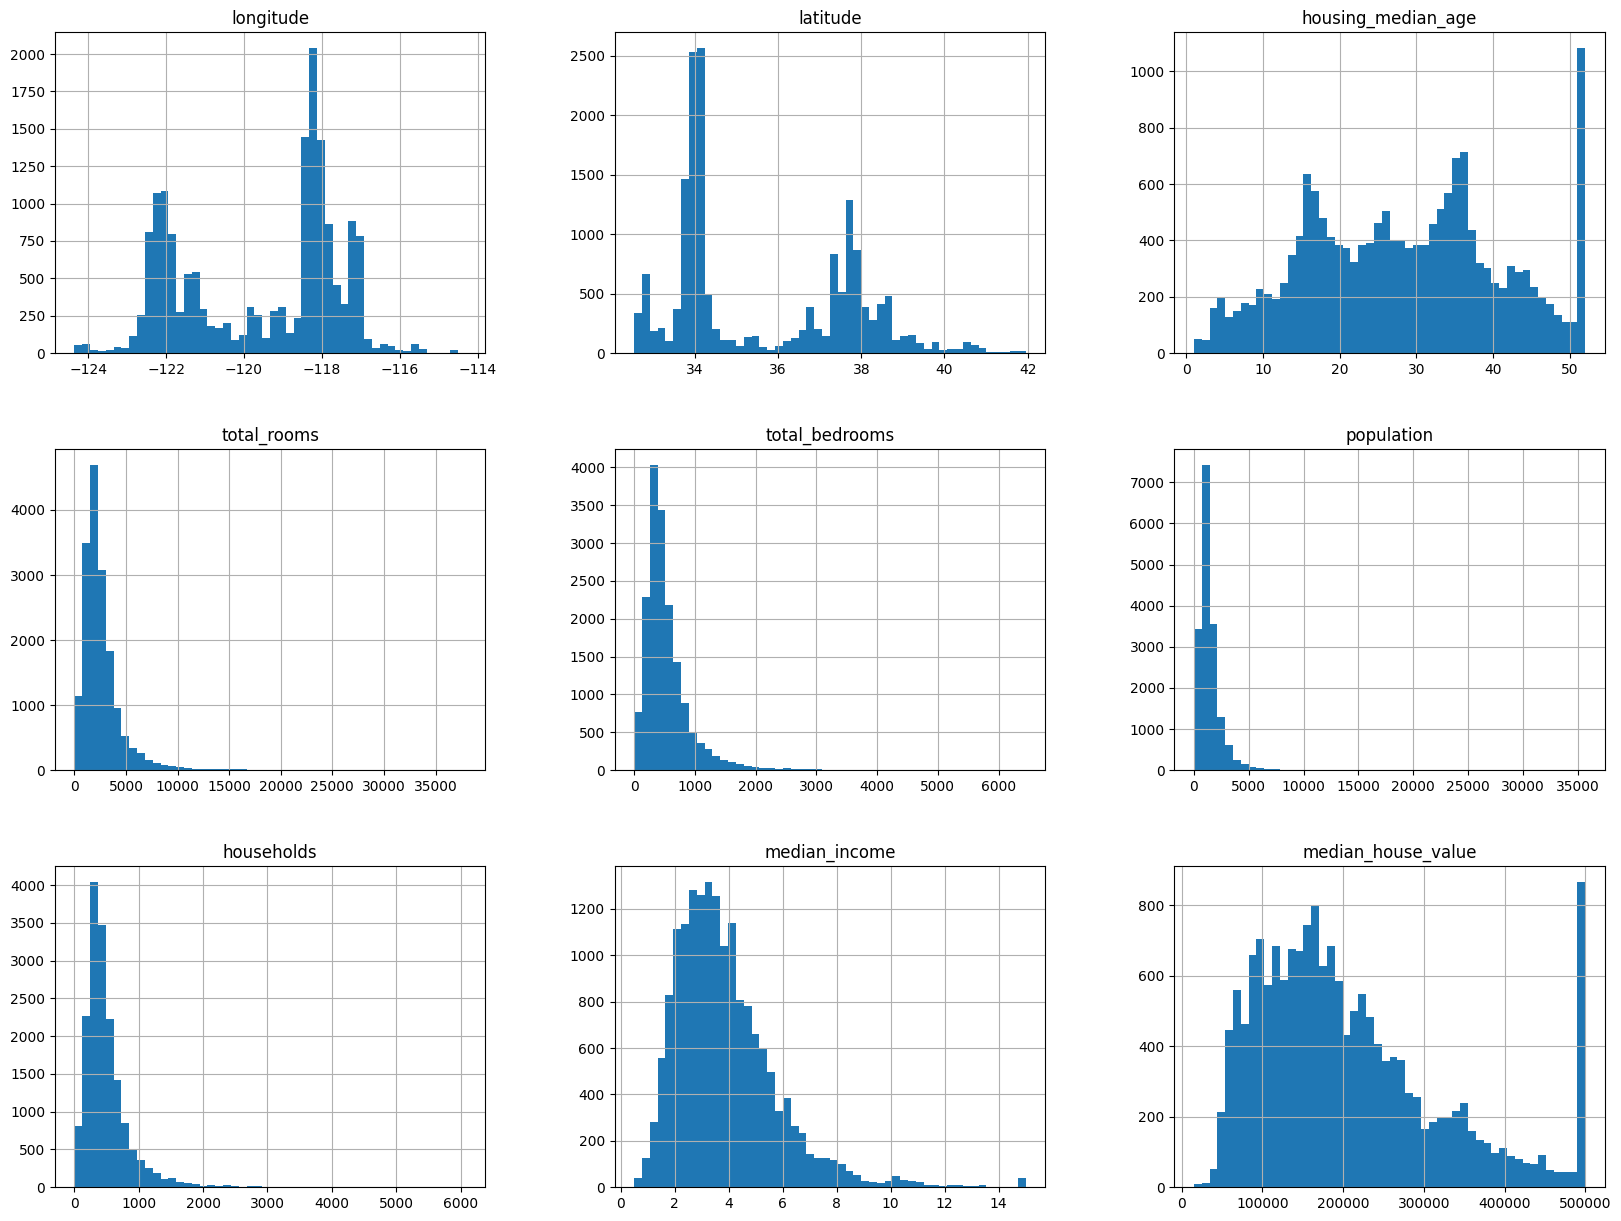

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

3. 데이터를 이용하여 지도를 봅니다.

<Axes: xlabel='longitude', ylabel='latitude'>

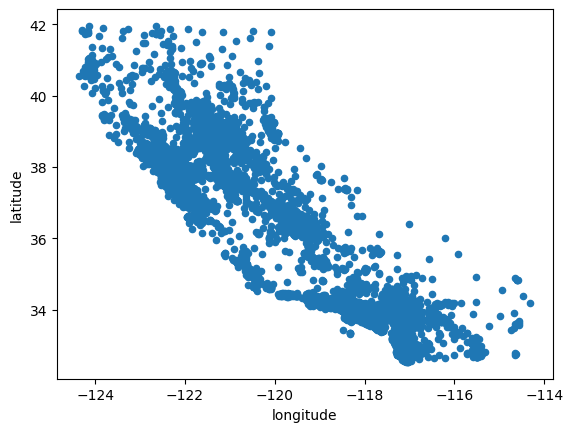

In [ ]:
housing.plot(kind='scatter',x='longitude',y='latitude')

4. 투명도를 적용하여 밀집도를 확인합니다.

<Axes: xlabel='longitude', ylabel='latitude'>

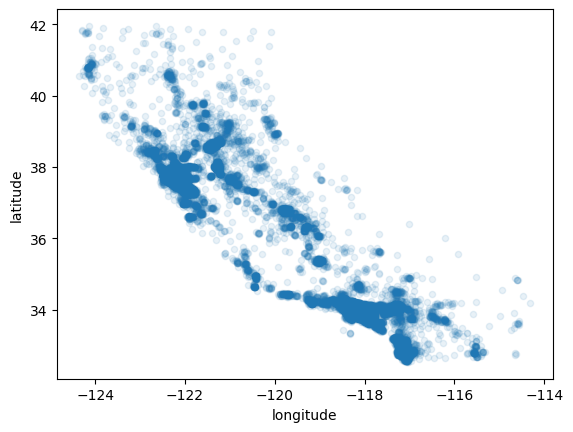

In [ ]:
housing.plot(kind='scatter',x='longitude',y='latitude', alpha=0.1)

5. 인구수, 밀집도를 반영한 가격 지도를 만들어봅니다.

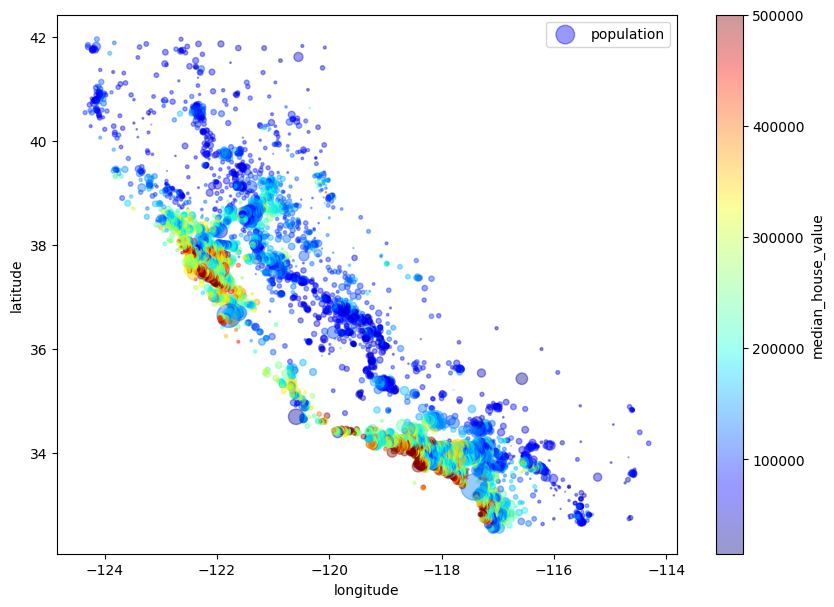

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

6. 각 데이터 값과 집값 사이의 연관관계를 훑어봅니다.

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691871
total_rooms           0.130991
housing_median_age    0.106758
households            0.061031
total_bedrooms        0.045783
population           -0.027850
longitude            -0.044982
latitude             -0.144917
Name: median_house_value, dtype: float64

7. 특정 자질과 목표치 사이의 관계를 그래프로 그려봅니다.

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

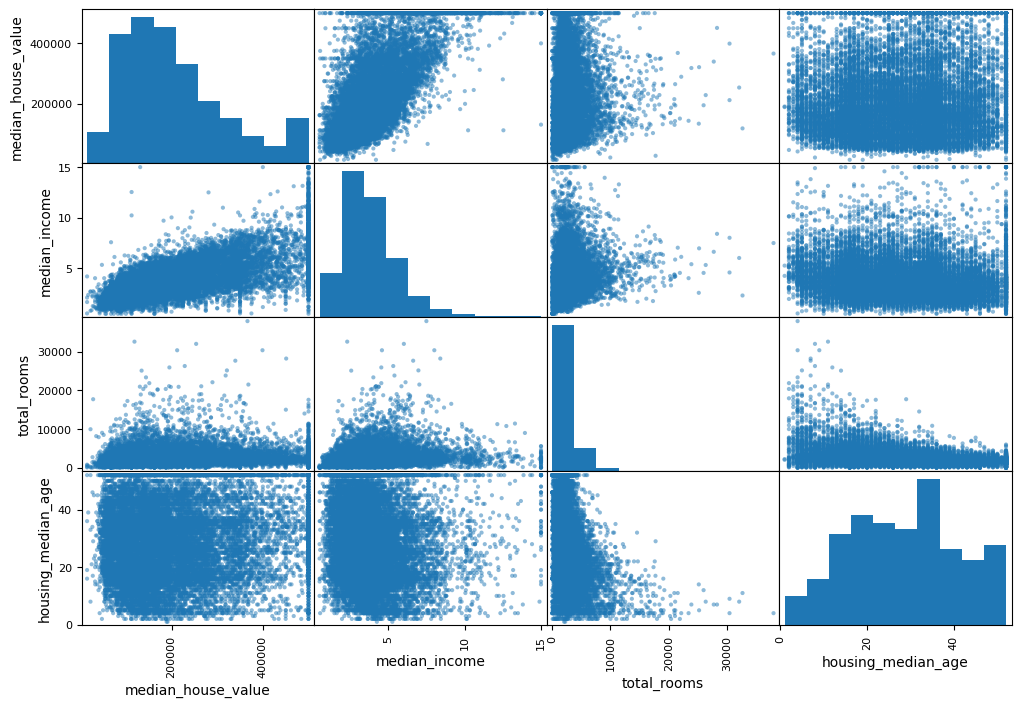

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

8. 예측하려는 값과 가장 연관성이 높은 자질만을 추려 연관성을 확인해봅니다.

(0.0, 16.0, 0.0, 550000.0)

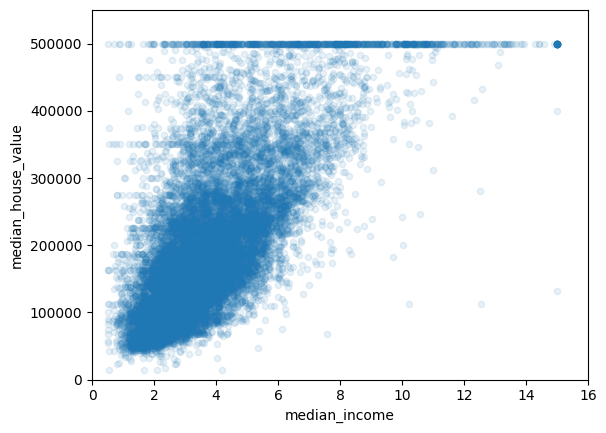

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

9. 훈련 데이터를 만듭니다.

In [ ]:
housing_copy = housing.copy()

housing = housing_copy.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제
housing_labels = housing_copy["median_house_value"].copy()


10. 데이터에 자질을 추가합니다.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        #print("Step1")
        #print(X)
        #print("Step2")
        #print(X[:, rooms_ix])
        #print("Step3")
        #print(X[:, households_ix])
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        #print("Step4")
        #print(rooms_per_household)
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


#housing
#attr_adder
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

11. 데이터에 feature(자질)이 잘 추가되었는지 확인해봅니다.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

full_pipeline = Pipeline([
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_prepared = full_pipeline.fit_transform(housing.values)
#housing_prepared.shape
#housing_prepared = full_pipeline.fit_transform(housing)

print("Step1")
print(housing)
print("Step2")
print(housing.values)
print("Step3")
print(housing_prepared)


Step1
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income 

12. 선형 회귀 모델을 훈련데이터를 대상으로 훈련해봅니다.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)
print(housing_prepared)
print(housing_labels)

# 훈련 샘플 몇 개를 사용해 전체 파이프라인을 적용해 보겠습니다
#print("step 1")
#print(housing)
#print("step 2")
#print(housing.iloc[:5])
#print("step 3")
#print(housing[:,3])


[[ 2.61936500e+00 -6.71520235e-01 -1.07967114e+00 ...  2.54055909e+00
  -2.04549373e-01  2.74245966e-01]
 [ 2.53956878e+00 -5.73264367e-01 -7.61872011e-01 ...  4.36514639e+00
  -1.33216731e-01  6.18054917e-01]
 [ 2.49468340e+00 -9.05462777e-01 -9.20771577e-01 ...  2.81515626e-01
  -3.22416800e-02  4.99931243e-01]
 ...
 [-2.36291168e+00  2.90780067e+00 -9.20771577e-01 ...  1.69968309e-01
  -6.14868203e-02 -2.49105729e-01]
 [-2.36291168e+00  2.88908527e+00 -7.61872011e-01 ...  5.94356115e-02
  -6.46046704e-02 -1.06762750e-01]
 [-2.38784800e+00  2.29955006e+00  1.85997083e+00 ...  5.12656490e-01
   2.19145536e-03 -8.28843637e-01]]
0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64


13. 훈련데이터 대상으로 예측도 해봅니다.

In [ ]:
#some_data_prepared = housing_prepared[:5]
#some_labels = housing_labels[:5]

some_data_prepared = housing_prepared[15:20]
some_labels = housing_labels[15:20]

print("Step1")
print(some_data_prepared)
print("Step2")
print(some_labels)


print("예측:", lin_reg.predict(some_data_prepared))
print("레이블:", some_labels)

Step1
[[ 2.44979803 -0.34400067 -0.92077158 -0.04021519  0.1129078  -0.36989618
  -0.26064878 -1.14484443  0.36824591 -0.11642768  0.29220584]
 [ 2.44979803 -0.94757244 -0.04682396 -0.44298911 -0.51581851 -0.66523887
  -0.63775257 -0.48125251  0.43938182 -0.09281829 -0.36085097]
 [ 2.44979803 -1.32655935 -0.60297245 -1.19257064 -1.20148607 -1.18971171
  -1.23331648 -1.586121   -1.5002887  -0.15007639  9.29138459]
 [ 2.44481077 -1.34995361 -0.92077158 -0.57602378 -0.36397517 -0.57027617
  -0.47130676 -1.40384547 -0.43382888 -0.13732051  1.12999855]
 [ 2.4398235  -0.79784921 -0.92077158 -1.16825741 -1.22283904 -1.22020432
  -1.26452507 -1.37203373  0.40471595 -0.25831497  0.59947956]]
Step2
15    69100.0
16    94900.0
17    25000.0
18    44000.0
19    27500.0
Name: median_house_value, dtype: float64
예측: [-58937.96864729  41918.86050433 130417.11214832  13716.04819627
 -46118.78082734]
레이블: 15    69100.0
16    94900.0
17    25000.0
18    44000.0
19    27500.0
Name: median_house_value, dty

14. 훈련데이터 대상으로 오차를 계산해봅니다.

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68486.23671820438

15. 이번엔 테스트 데이터를 대상으로 값을 예측해봅니다.

In [ ]:
housing_test = pd.read_csv('./sample_data/california_housing_test.csv')
housing_test_copy = housing_test.copy()

test_data = housing_test_copy.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제
test_labels = housing_test_copy["median_house_value"].copy()

print("Step1")
print(test_data)
print("Step2")
print(test_data.values)

test_prepared = full_pipeline.fit_transform(test_data.values)

print("Step3")
print(test_prepared)

predict_result = lin_reg.predict(test_prepared)

print("예측:", predict_result[:5])
print("레이블:", test_labels[:5])

Step1
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  median_income  
0         1

16. 테스트 대상으로 한 오차를 계산해봅니다.

In [ ]:
from sklearn.metrics import mean_squared_error

test_predictions = lin_reg.predict(test_prepared)
lin_mse = mean_squared_error(test_labels, test_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69066.77698853915

17. 이번에는 다른 모델 (decision tree)를 이용하여 훈련해봅니다.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

18. decision tree를 이용하여 훈련 데이터 대상으로 예측해보고, 에러도 계산해봅니다.

In [ ]:
some_data_prepared = housing_prepared[:5]
some_labels = housing_labels.iloc[:5]

#some_data_prepared = full_pipeline.transform(some_data.values)
#some_data_prepared = full_pipeline.fit_transform(some_data.values)
print("step2")
print(some_data_prepared)
#full_pipeline.fit_transform(test_data.values)
some_predictions = tree_reg.predict(some_data_prepared)
print("예측:", some_predictions)
print("레이블:", some_labels)

tree_mse = mean_squared_error(some_labels, some_predictions)
tree_rmse = np.sqrt(tree_mse)
print("tree_rmse: ",tree_rmse)

step2
[[ 2.619365   -0.67152023 -1.07967114  1.36169494  1.76420407 -0.36118401
  -0.07599796 -1.25254316  2.54055909 -0.20454937  0.27424597]
 [ 2.53956878 -0.57326437 -0.76187201  2.29660752  3.23044127 -0.26186523
  -0.09940441 -1.08148298  4.36514639 -0.13321673  0.61805492]
 [ 2.4946834  -0.90546278 -0.92077158 -0.88246225 -0.86695622 -0.95535424
  -0.99925206 -1.17010515  0.28151563 -0.03224168  0.49993124]
 [ 2.48969614 -0.92885703 -1.15912093 -0.52418613 -0.48023023 -0.79679269
  -0.71577404 -0.36260047  0.4736084  -0.17276476  0.20333335]
 [ 2.48969614 -0.96160899 -0.68242223 -0.54574692 -0.5063283  -0.70182999
  -0.62214827 -1.02645443  0.04354829 -0.14727554  0.19800815]]
예측: [66900. 80100. 85700. 73400. 65500.]
레이블: 0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64
tree_rmse:  0.0


19. decision tree를 이용하여 테스트 데이터 대상으로 예측해보고, 에러도 계산해봅니다.

In [ ]:
housing_test = pd.read_csv('./sample_data/california_housing_test.csv')
housing_test_copy = housing_test.copy()

test_data = housing_test_copy.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제
test_labels = housing_test_copy["median_house_value"].copy()

test_prepared = full_pipeline.fit_transform(test_data.values)

predict_result = tree_reg.predict(test_prepared)

print("예측:", predict_result[:5])
print("레이블:", test_labels[:5])

tree_mse = mean_squared_error(test_labels, predict_result)
tree_rmse = np.sqrt(tree_mse)
print("tree_rmse: ",tree_rmse)

예측: [367400. 187300. 422200.  75000.  57000.]
레이블: 0    344700.0
1    176500.0
2    270500.0
3    330000.0
4     81700.0
Name: median_house_value, dtype: float64
tree_rmse:  75296.56915366728
